In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')

In [3]:
df_2015 = df_2015.assign(year=2015)
df_2016 = df_2016.assign(year=2016)
df_2017 = df_2017.assign(year=2017)
df_2018 = df_2018.assign(year=2018)
df_2019 = df_2019.assign(year=2019)

![Data_Mentah](data_awal.png)

In [4]:
# # Drop unnecessary columns
# df_2015 = df_2015.drop(columns=['Standard Error'])
# df_2016 = df_2016.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval'])
# df_2017 = df_2017.drop(columns=['Whisker.high', 'Whisker.low'])

# # Rename columns
# df_2017 = df_2017.rename(columns={
#     'Happiness.Rank': 'Happiness Rank',
#     'Happiness.Score': 'Happiness Score',
#     'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
#     'Health..Life.Expectancy.': 'Health (Life Expectancy)',
#     'Trust..Government.Corruption.': 'Trust (Government Corruption)',
#     'Dystopia.Residual': 'Dystopia Residual'
# })

# df_2018 = df_2018.rename(columns={
#     'Overall Rank': 'Happiness Rank',
#     'Country or Region': 'Country',
#     'Score': 'Happiness Score',
#     'GDP per Capita': 'Economy (GDP per Capita)',
#     'Social Support': 'Family',
#     'Healthy Life Expectancy': 'Health (Life Expectancy)',
#     'Freedom to Make Life Choices': 'Freedom',
#     'Perceptions of Corruption': 'Trust (Government Corruption)'
# })

# df_2019 = df_2019.rename(columns={
#     'Overall Rank': 'Happiness Rank',
#     'Country or Region': 'Country',
#     'Score': 'Happiness Score',
#     'GDP per Capita': 'Economy (GDP per Capita)',
#     'Social Support': 'Family',
#     'Healthy Life Expectancy': 'Health (Life Expectancy)',
#     'Freedom to Make Life Choices': 'Freedom',
#     'Perceptions of Corruption': 'Trust (Government Corruption)'
# })


### Mapping Region ke Entitas yang tidak ada atribut region

In [5]:
df_region_mapping = pd.concat([df_2015[['Country', 'Region']], df_2016[['Country', 'Region']]])

# Buat dictionary mapping Country -> Region
region_mapping = df_region_mapping.drop_duplicates().set_index('Country')['Region'].to_dict()

df_2017['Region'] = df_2017['Country'].map(region_mapping)
df_2018['Region'] = df_2018['Country'].map(region_mapping)
df_2019['Region'] = df_2019['Country'].map(region_mapping)


In [6]:
df_2017.head()

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,year,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017,Western Europe


In [7]:
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019]
combined_df = pd.concat(dfs, ignore_index=True)

In [8]:
combined_df = combined_df.drop(columns=['Dystopia Residual'])

In [9]:
combined_df.to_csv('combined_data_fix.csv', index=False)

In [10]:
combined_df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# 1) Data Understanding
## Descriptive Analytics to understand the data

In [11]:
print(combined_df.describe())


       Happiness Rank  Happiness Score  Economy (GDP per Capita)      Family  \
count      782.000000       782.000000                782.000000  782.000000   
mean        78.698210         5.379018                  0.916047    1.078392   
std         45.182384         1.127456                  0.407340    0.329548   
min          1.000000         2.693000                  0.000000    0.000000   
25%         40.000000         4.509750                  0.606500    0.869363   
50%         79.000000         5.322000                  0.982205    1.124735   
75%        118.000000         6.189500                  1.236187    1.327250   
max        158.000000         7.769000                  2.096000    1.644000   

       Health (Life Expectancy)     Freedom  Trust (Government Corruption)  \
count                782.000000  782.000000                     781.000000   
mean                   0.612416    0.411091                       0.125436   
std                    0.248309    0.152880  

In [12]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Region                         774 non-null    object 
 2   Happiness Rank                 782 non-null    int64  
 3   Happiness Score                782 non-null    float64
 4   Economy (GDP per Capita)       782 non-null    float64
 5   Family                         782 non-null    float64
 6   Health (Life Expectancy)       782 non-null    float64
 7   Freedom                        782 non-null    float64
 8   Trust (Government Corruption)  781 non-null    float64
 9   Generosity                     782 non-null    float64
 10  year                           782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 67.3+ KB
None


## Ringkasan Data

### Jumlah Data
Dataset ini terdiri dari 782 baris data yang mencakup tahun 2015 hingga 2019.

### Fitur
Dataset ini memiliki 10 fitur, yaitu:
- 'Happiness Rank'
- 'Happiness Score'
- 'Economy (GDP per Capita)'
- 'Family'
- 'Health (Life Expectancy)'
- 'Freedom'
- 'Trust (Government Corruption)'
- 'Generosity'
- 'Region'
- 'year'

### Tipe Data
Mayoritas fitur dalam dataset ini adalah numerik (`float64` dan `int64`), kecuali 'Country' dan 'Region' yang merupakan tipe data objek.

### Statistik Deskriptif
- Nilai rata-rata skor kebahagiaan (Happiness Score) adalah sekitar 5.38 dengan standar deviasi 1.13. Nilai minimumnya adalah 2.69 dan maksimumnya adalah 7.77.
- Nilai rata-rata GDP per kapita (Economy (GDP per Capita)) adalah sekitar 0.92 dengan standar deviasi 0.41. Nilai minimumnya adalah 0 dan maksimumnya adalah 2.10.
- Nilai rata-rata harapan hidup sehat (Health (Life Expectancy)) adalah sekitar 0.61 dengan standar deviasi 0.25. Nilai minimumnya adalah 0 dan maksimumnya adalah 1.14.

### Data Null
Terdapat beberapa data yang hilang pada fitur 'Trust (Government Corruption)'.

### Memori
Dataset ini menggunakan sekitar 67.3+ KB memori.


In [13]:
print(combined_df.isnull().sum())

Country                          0
Region                           8
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
year                             0
dtype: int64


In [14]:
combined_df[combined_df.isnull().any(axis=1)]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
347,Taiwan Province of China,NaN,33,6.422,1.433627,1.384565,0.793984,0.361467,0.063829,0.258360,2017
385,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.293934,0.374466,2017
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096000,0.776000,0.670000,0.284000,NaN,0.186000,2018
507,Trinidad & Tobago,NaN,38,6.192,1.223000,1.492000,0.564000,0.575000,0.019000,0.171000,2018
527,Northern Cyprus,NaN,58,5.835,1.229000,1.211000,0.909000,0.495000,0.154000,0.179000,2018
664,Trinidad & Tobago,NaN,39,6.192,1.231000,1.477000,0.713000,0.489000,0.016000,0.185000,2019
689,Northern Cyprus,NaN,64,5.718,1.263000,1.252000,1.042000,0.417000,0.162000,0.191000,2019
709,North Macedonia,NaN,84,5.274,0.983000,1.294000,0.838000,0.345000,0.034000,0.185000,2019
745,Gambia,NaN,120,4.516,0.308000,0.939000,0.428000,0.382000,0.167000,0.269000,2019


In [15]:
region_mapping_update = {
    'Taiwan Province of China': 'East Asia',
    'Hong Kong S.A.R., China': 'East Asia & Pacific',
    'Trinidad & Tobago': 'Caribbean',
    'Northern Cyprus': 'Southeast Europe',
    'North Macedonia': 'Southeast Europe',
    'Gambia': 'West Africa'
}

region_mapping = {**region_mapping, **region_mapping_update}
combined_df['Region'] = combined_df['Country'].map(region_mapping)


In [16]:
print(combined_df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
year                             0
dtype: int64


In [17]:
combined_df[combined_df.isnull().any(axis=1)]

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
489,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.67,0.284,NaN,0.186,2018


In [18]:
uae_mean_trust = combined_df[(combined_df['Country'] == 'United Arab Emirates') & 
                             (combined_df['year'] < 2018)]['Trust (Government Corruption)'].mean()
combined_df['Trust (Government Corruption)'].fillna(uae_mean_trust, inplace=True)

In [19]:
print(combined_df.isnull().sum())

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
year                             0
dtype: int64


In [20]:

# scaler = MinMaxScaler()
# combined_df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']] = scaler.fit_transform(combined_df[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']])


C:\Users\cicog\AppData\Local\Temp\ipykernel_20816\460315310.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = combined_df.corr()


<Axes: >

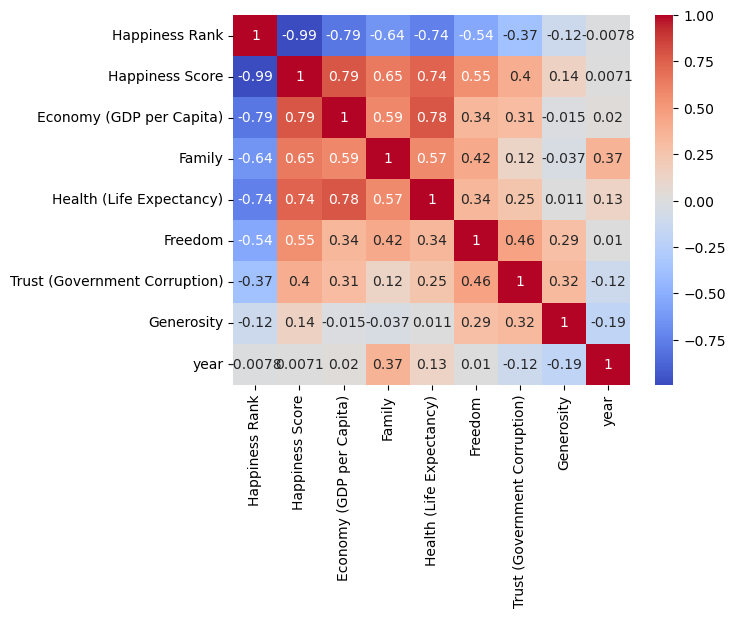

In [21]:
corr = combined_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Analisis Heatmap

Heatmap tersebut menunjukkan matriks korelasi antara berbagai variabel dalam dataset kami. Nilai dalam setiap sel mewakili koefisien korelasi antara dua variabel. Warna sel mengindikasikan kekuatan dan arah korelasi: warna merah muda menunjukkan korelasi positif, sedangkan warna biru menunjukkan korelasi negatif.

Berikut adalah beberapa observasi dari heatmap:

1. **Happiness Score**: Variabel ini memiliki korelasi positif yang kuat dengan 'Economy (GDP per Capita)', 'Family', dan 'Health (Life Expectancy)'. Ini berarti bahwa peningkatan dalam GDP per kapita, dukungan sosial, atau harapan hidup cenderung dikaitkan dengan peningkatan dalam skor kebahagiaan.

2. **Happiness Rank**: Variabel ini memiliki korelasi negatif yang kuat dengan 'Happiness Score', 'Economy (GDP per Capita)', 'Family', dan 'Health (Life Expectancy)'. Ini berarti bahwa peningkatan dalam peringkat kebahagiaan (dengan peringkat 1 sebagai yang tertinggi) cenderung dikaitkan dengan penurunan dalam skor kebahagiaan, GDP per kapita, dukungan sosial, atau harapan hidup.

3. **Trust (Government Corruption)**: Variabel ini memiliki korelasi positif yang moderat dengan 'Freedom'. Ini berarti bahwa peningkatan dalam persepsi korupsi pemerintah cenderung dikaitkan dengan peningkatan dalam kebebasan.

4. **Year**: Variabel ini memiliki korelasi yang sangat lemah dengan variabel lainnya, menunjukkan bahwa tidak ada tren yang kuat sepanjang waktu untuk variabel-variabel ini.

Harap dicatat bahwa korelasi tidak menunjukkan sebab akibat. Meskipun dua variabel mungkin memiliki korelasi yang kuat, ini tidak berarti bahwa satu variabel menyebabkan perubahan pada variabel lainnya.


C:\Users\cicog\AppData\Local\Temp\ipykernel_20816\908204915.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Happiness_Continent = combined_df.groupby('Region').mean().reset_index()


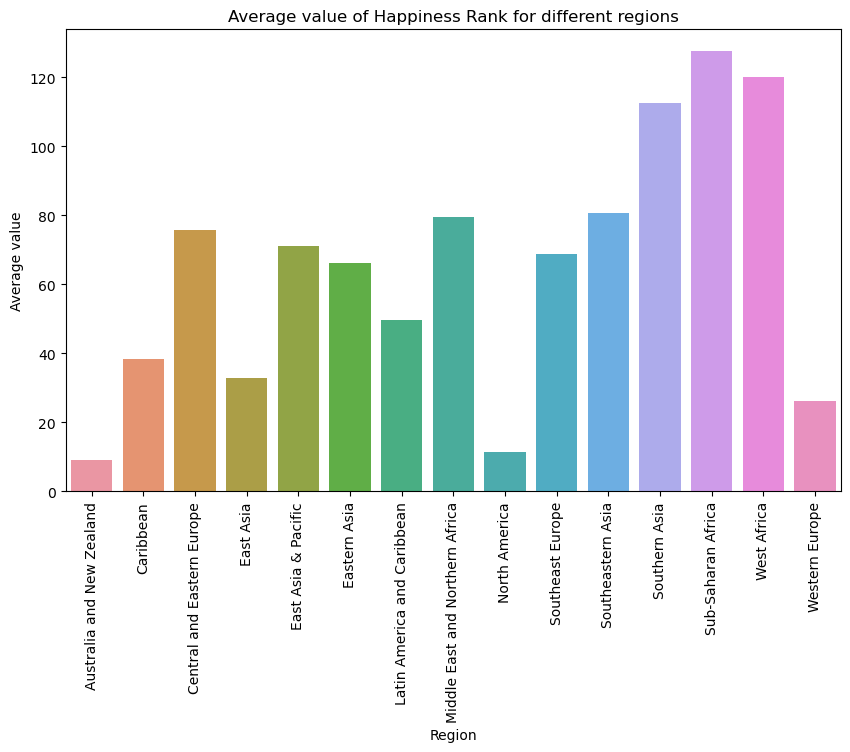

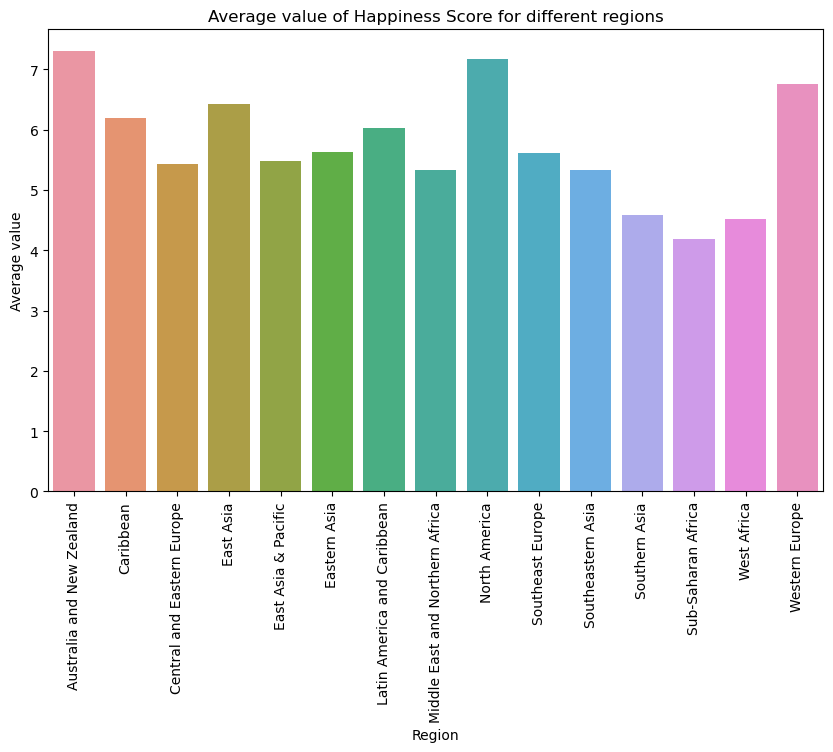

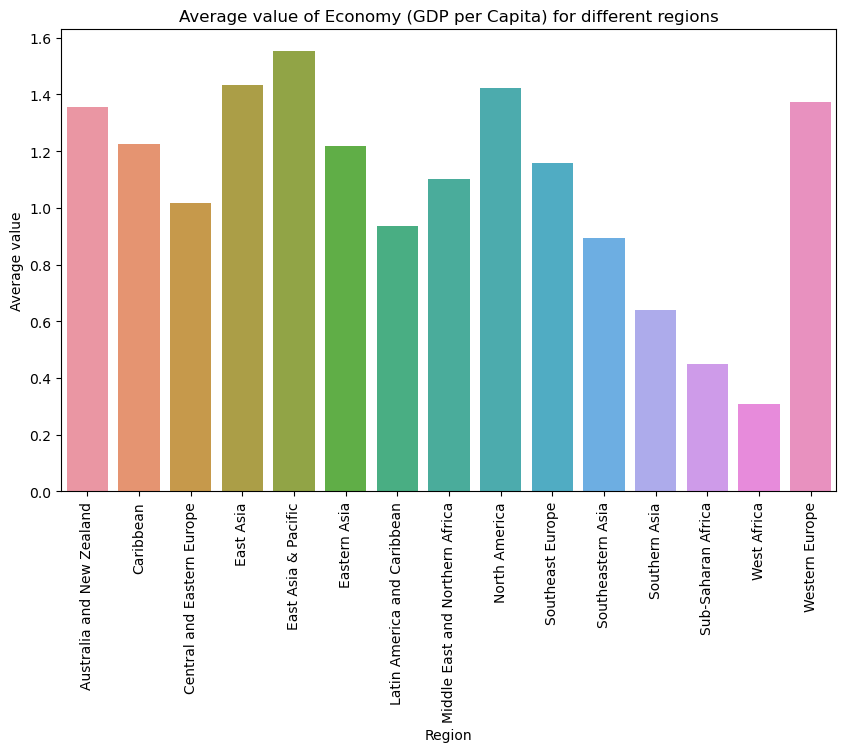

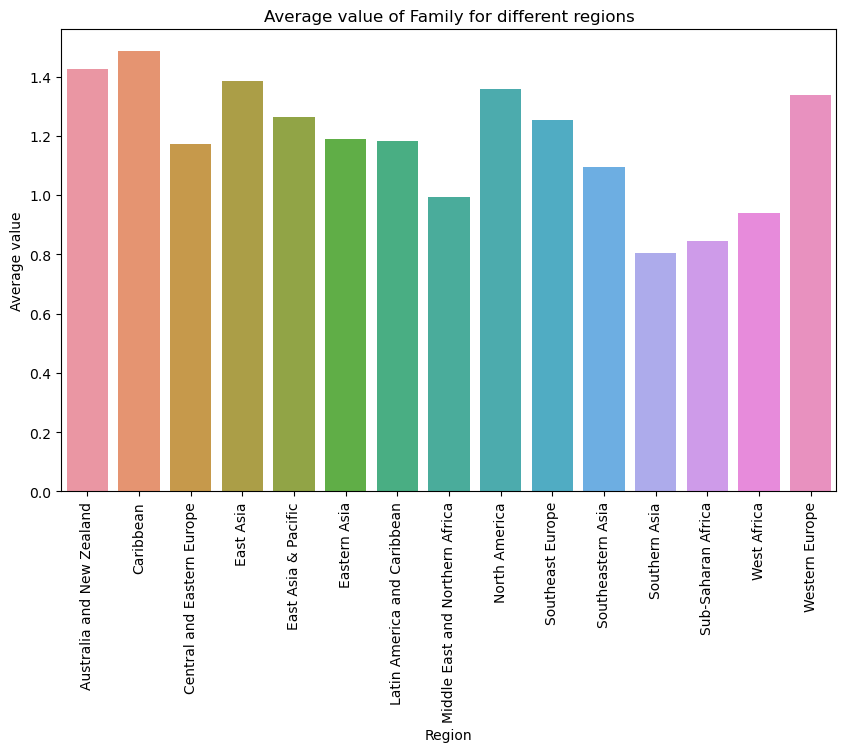

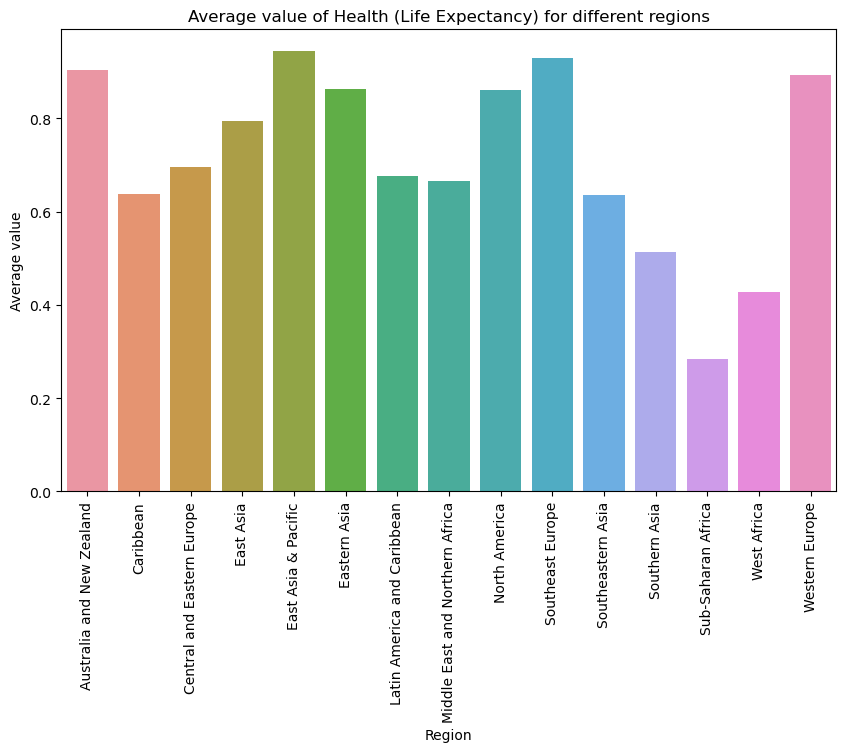

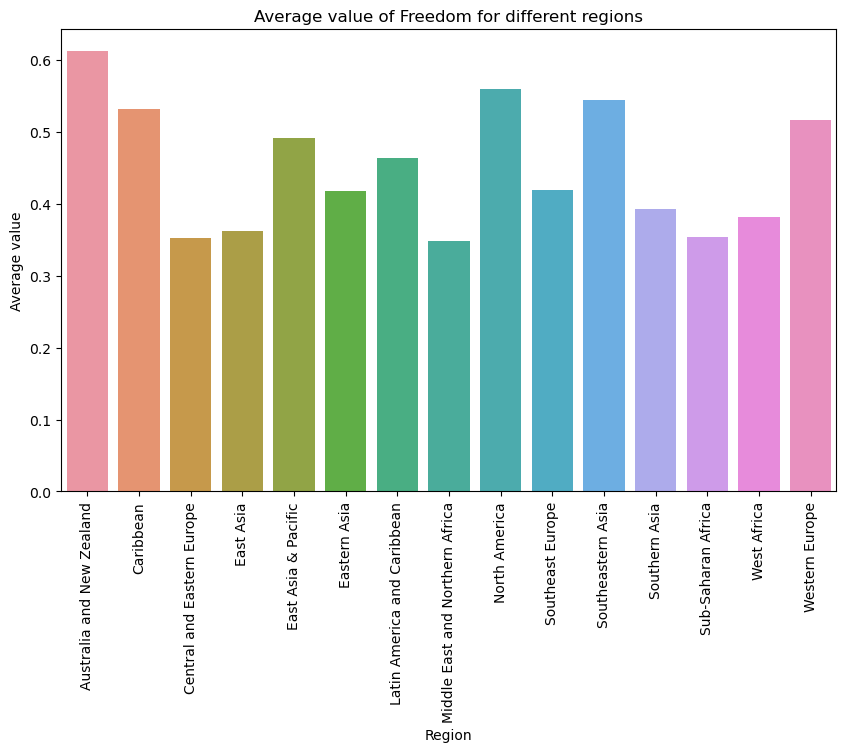

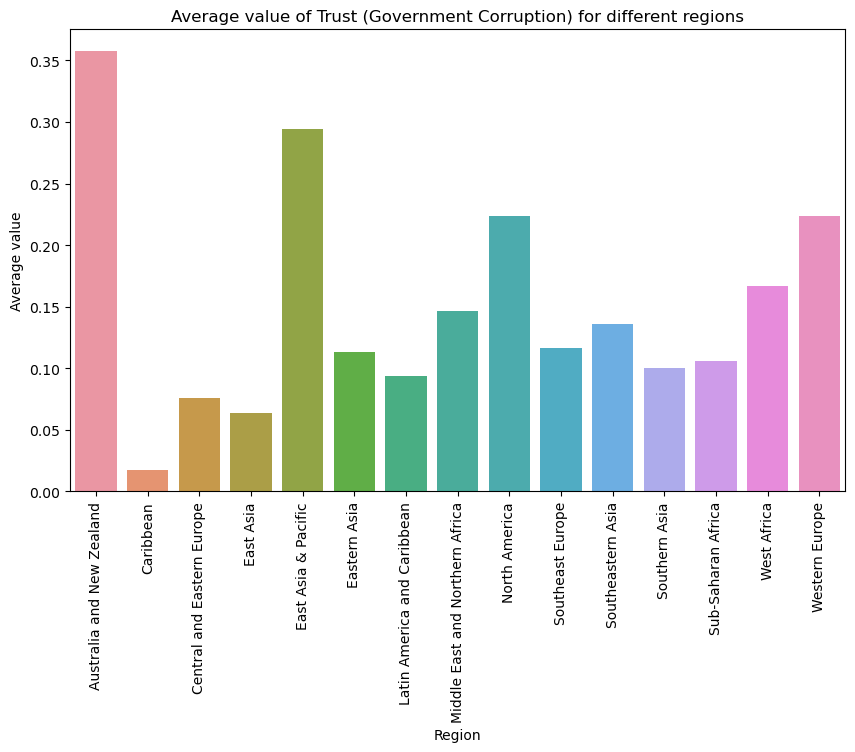

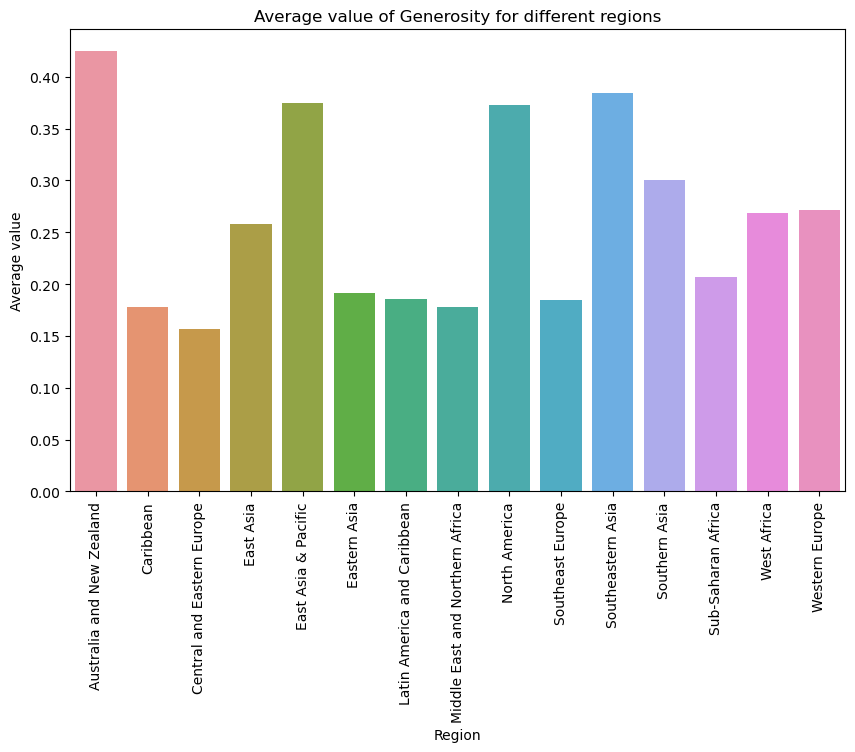

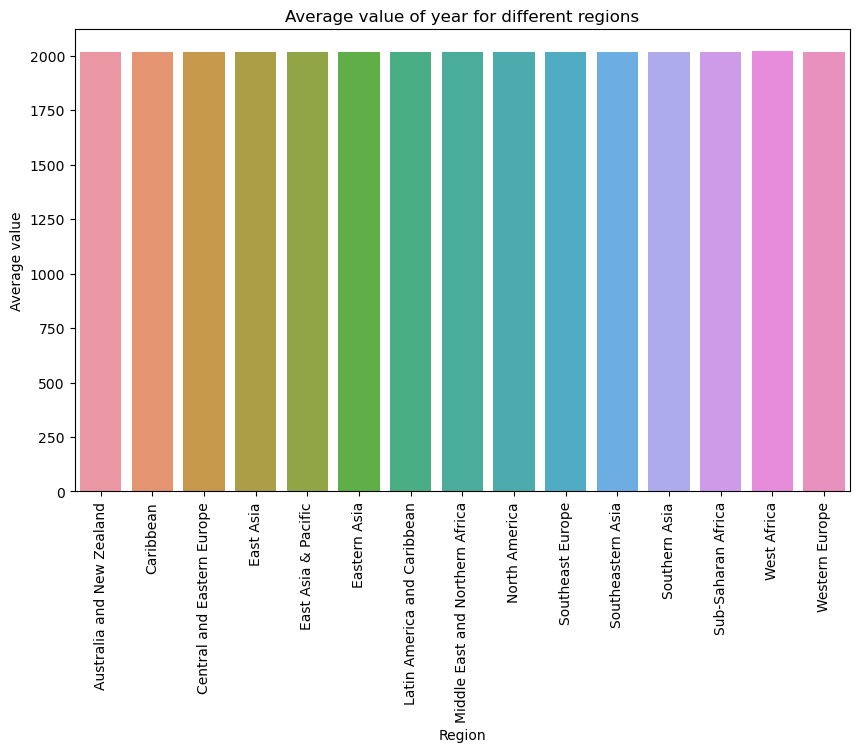

In [22]:

Happiness_Continent = combined_df.groupby('Region').mean().reset_index()
Happiness_Continent_melt = pd.melt(Happiness_Continent, id_vars='Region', var_name='variable', value_name='value')

for variable in Happiness_Continent_melt['variable'].unique():
    plt.figure(figsize=(10,6))
    sns.barplot(x='Region', y='value', data=Happiness_Continent_melt[Happiness_Continent_melt['variable'] == variable])
    plt.title(f'Average value of {variable} for different regions')
    plt.ylabel('Average value')
    plt.xticks(rotation=90)
    plt.show()


## Analisis Rendahnya Tingkat Kebahagiaan di Region Asia Timur dan Pasifik

Setelah menganalisis data, terdapat temuan bahwa tingkat kebahagiaan di region Asia Timur dan Pasifik cenderung rendah, meskipun memiliki GDP (ekonomi) yang relatif tinggi dan tingkat korupsi yang rendah. Hal ini menimbulkan pertanyaan tentang faktor-faktor apa yang mungkin menyebabkan rendahnya tingkat kebahagiaan di region tersebut.

Berikut adalah beberapa kemungkinan faktor yang dapat mempengaruhi rendahnya tingkat kebahagiaan di region Asia Timur dan Pasifik:

1. **Faktor Budaya:** Budaya dan nilai-nilai sosial yang berbeda dapat memengaruhi persepsi tentang kebahagiaan. Beberapa masyarakat di Asia Timur mungkin memiliki tekanan yang tinggi terkait prestasi, persaingan, dan ekspektasi sosial, yang dapat mengurangi tingkat kebahagiaan.

2. **Ketidaksetaraan Sosial-Ekonomi:** Meskipun GDP per kapita mungkin relatif tinggi, ketidaksetaraan ekonomi yang tinggi dapat menyebabkan ketidakpuasan dan ketidakadilan sosial yang mempengaruhi kebahagiaan.

3. **Stres dan Keseimbangan Hidup:** Peningkatan urbanisasi dan tekanan hidup dalam lingkungan perkotaan yang padat dapat menyebabkan stres, kurangnya keseimbangan antara kehidupan kerja dan kehidupan pribadi, dan masalah kesehatan mental yang pada gilirannya dapat mempengaruhi tingkat kebahagiaan.

4. **Kualitas Lingkungan Hidup:** Polusi udara, kepadatan penduduk yang tinggi, dan kekurangan akses terhadap ruang hijau dan alam dapat mempengaruhi kualitas hidup dan tingkat kebahagiaan.

5. **Tingkat Stabilitas Politik:** Ketidakpastian politik, konflik regional, atau kekurangan kebebasan politik dan kebebasan berpendapat dapat menciptakan ketidakamanan dan kecemasan yang dapat mengurangi tingkat kebahagiaan.

Untuk mendapatkan wawasan yang lebih mendalam, diperlukan analisis lebih lanjut dengan memeriksa data terkait faktor-faktor seperti tingkat stres, keseimbangan hidup, ketidaksetaraan ekonomi, dan lingkungan hidup di region Asia Timur dan Pasifik. Penelitian lebih lanjut tentang aspek budaya, sosial, dan politik masyarakat di region tersebut juga dapat memberikan pemahaman yang lebih baik tentang faktor-faktor yang berkontribusi terhadap rendahnya tingkat kebahagiaan.


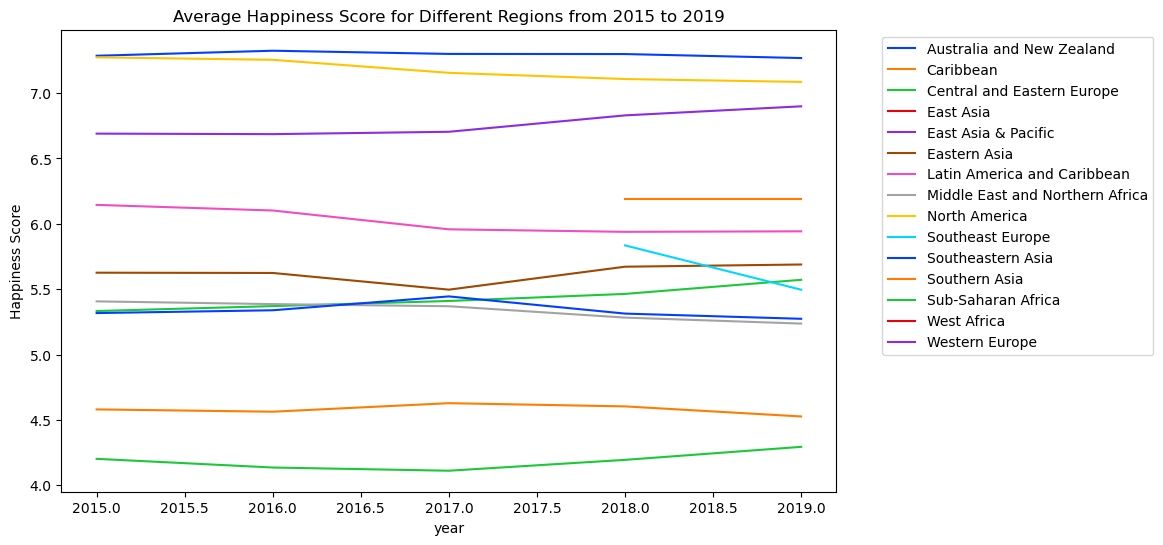

In [23]:
region_yearly = combined_df.groupby(['Region', 'year'])['Happiness Score'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='Happiness Score', hue='Region', data=region_yearly, palette='bright')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Average Happiness Score for Different Regions from 2015 to 2019')
plt.show()



## Analisis Skor Kebahagiaan Rata-rata Berdasarkan Region dari Tahun 2015 hingga 2019

Kode tersebut menghasilkan plot garis yang menunjukkan skor kebahagiaan rata-rata untuk setiap region dari tahun 2015 hingga 2019. Setiap garis pada plot mewakili satu region.
### Wawasan:

- Skor kebahagiaan rata-rata bervariasi secara signifikan antar region, yang menunjukkan bahwa faktor-faktor regional memiliki dampak besar terhadap kebahagiaan.
- Beberapa region menunjukkan peningkatan atau penurunan skor kebahagiaan sepanjang waktu, yang dapat menunjukkan perubahan kondisi sosial, ekonomi, atau politik di region tersebut.

![Data_Mentah](southeast2018-2019.png)

## Pengaruh Rusia di Southeast Europe

Pada tahun 2018, terjadi peningkatan kekhawatiran tentang pengaruh Rusia di Southeast Europe. Hal ini mungkin telah menciptakan ketidakstabilan politik dan ekonomi di beberapa negara di region ini, yang berpotensi menurunkan skor kebahagiaan.

## Perjuangan Hiduo dan Sikap Pemuda

Laporan dari Friedrich Ebert Foundation menunjukkan bahwa pemuda di Southeast Europe menghadapi tantangan signifikan dalam hal pendidikan, pekerjaan, migrasi, partisipasi politik, dan nilai-nilai. Ketidakpastian ekonomi di rumah, khususnya, telah mendorong emigrasi pemuda, yang mungkin berdampak negatif pada skor kebahagiaan.

## Demokrasi dan Hak Asasi Manusia

Terdapat juga laporan tentang perkembangan demokrasi dan hak asasi manusia di Southeast Europe selama tahun 2018. Perubahan dalam kondisi ini mungkin juga mempengaruhi skor kebahagiaan.



In [28]:
# Pilih data negara Indonesia
indonesia_data = combined_df[(combined_df['Country'] == 'Indonesia') & (combined_df['year'] == 2019)]

# Pilih data negara dengan peringkat kebahagiaan tertinggi pertama pada tahun 2019
top_country_data = combined_df[(combined_df['Happiness Rank'] == 1) & (combined_df['year'] == 2019)]

# Pilih data negara dengan peringkat kebahagiaan tertinggi terakhir pada tahun 2019
bottom_country_data = combined_df[(combined_df['Happiness Rank'] == combined_df[combined_df['year'] == 2019]['Happiness Rank'].max()) & (combined_df['year'] == 2019)]

# Gabungkan data negara Indonesia, negara dengan peringkat kebahagiaan tertinggi pertama, dan negara dengan peringkat kebahagiaan tertinggi terakhir
comparison_data = pd.concat([ top_country_data,indonesia_data, bottom_country_data])

comparison_data


,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year,Cluster
626,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2019,0
717,Indonesia,Southeastern Asia,92,5.192,0.931,1.203,0.660,0.491,0.028,0.498,2019,0
781,South Sudan,Sub-Saharan Africa,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,2019,1


## Mengapa Indonesia?

Berikut adalah 10 alasan mengapa Indonesia memiliki tingkat kebahagiaan rendah, meskipun memiliki pemilikan keluarga yang cukup tinggi:

- **Rendahnya GDP:** Meskipun pemilikan keluarga cukup tinggi, GDP (PDB) Indonesia masih rendah, yang dapat mempengaruhi kesejahteraan ekonomi secara keseluruhan.

- **Ketidakstabilan Ekonomi:** Indonesia mungkin mengalami ketidakstabilan ekonomi yang dapat menyebabkan ketidakpastian dan kecemasan di kalangan masyarakat.

- **Korupsi yang Merajalela:** Tingkat kepercayaan terhadap pemerintahan rendah karena tindakan korupsi yang merajalela, yang dapat mengurangi kepercayaan dan kepuasan masyarakat terhadap sistem pemerintahan.

- **Kesenjangan Sosial-Ekonomi:** Adanya kesenjangan sosial-ekonomi yang besar dapat menciptakan ketidakpuasan dan ketidakadilan di masyarakat.

- **Ketidaksetaraan Akses Terhadap Layanan Dasar:** Tidak semua penduduk Indonesia memiliki akses yang sama terhadap layanan dasar seperti pendidikan, kesehatan, dan infrastruktur, yang dapat memengaruhi tingkat kebahagiaan.

- **Krisis Lingkungan:** Indonesia menghadapi masalah serius terkait lingkungan, termasuk deforestasi, polusi udara dan air, serta bencana alam, yang dapat mempengaruhi kualitas hidup dan kebahagiaan.

- **Ketidakstabilan Politik:** Ketidakpastian politik dan konflik politik dapat menciptakan ketidakamanan dan kecemasan di kalangan masyarakat.

- **Kualitas Hidup yang Rendah:** Faktor-faktor seperti kualitas layanan publik, infrastruktur, dan kesehatan yang rendah dapat mempengaruhi tingkat kebahagiaan.

- **Tingkat Stres yang Tinggi:** Pola hidup yang padat dan tekanan kerja yang tinggi dapat menyebabkan tingkat stres yang tinggi di kalangan masyarakat.

- **Kurangnya Kebebasan dan Partisipasi Politik:** Keterbatasan kebebasan berpendapat dan partisipasi politik yang rendah dapat menimbulkan ketidakpuasan dan ketidakadilan di masyarakat.



In [29]:

Q1 = combined_df['Economy (GDP per Capita)'].quantile(0.25)
Q3 = combined_df['Economy (GDP per Capita)'].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['Economy (GDP per Capita)'] < lower_bound) | (combined_df['Economy (GDP per Capita)'] > upper_bound)]
print("Negara-negara outlier dalam data kebahagiaan:")
print(outliers[['Country', 'Economy (GDP per Capita)']])


Negara-negara outlier dalam data kebahagiaan:
Empty DataFrame
Columns: [Country, Economy (GDP per Capita)]
Index: []


In [30]:

Q1 = combined_df['Happiness Score'].quantile(0.25)
Q3 = combined_df['Happiness Score'].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['Happiness Score'] < lower_bound) | (combined_df['Happiness Score'] > upper_bound)]
print("Negara-negara outlier dalam data kebahagiaan:")
print(outliers[['Country', 'Happiness Score']])


Negara-negara outlier dalam data kebahagiaan:
Empty DataFrame
Columns: [Country, Happiness Score]
Index: []


In [40]:

Q1 = combined_df['Family'].quantile(0.25)
Q3 = combined_df['Family'].quantile(0.75)

IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = combined_df[(combined_df['Family'] < lower_bound) | (combined_df['Family'] > upper_bound)]
print("Negara-negara outlier dalam data kebahagiaan:")
print(outliers[['Country', 'Family']])


Negara-negara outlier dalam data kebahagiaan:
                      Country   Family
147  Central African Republic  0.00000
157                      Togo  0.13995
289                    Malawi  0.14700
310                     Benin  0.10419
311               Afghanistan  0.11037
312                      Togo  0.00000
313                     Syria  0.14866
469  Central African Republic  0.00000
624  Central African Republic  0.00000
780  Central African Republic  0.00000


Tidak ada outlier

C:\Users\cicog\AppData\Local\Temp\ipykernel_20816\687496958.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


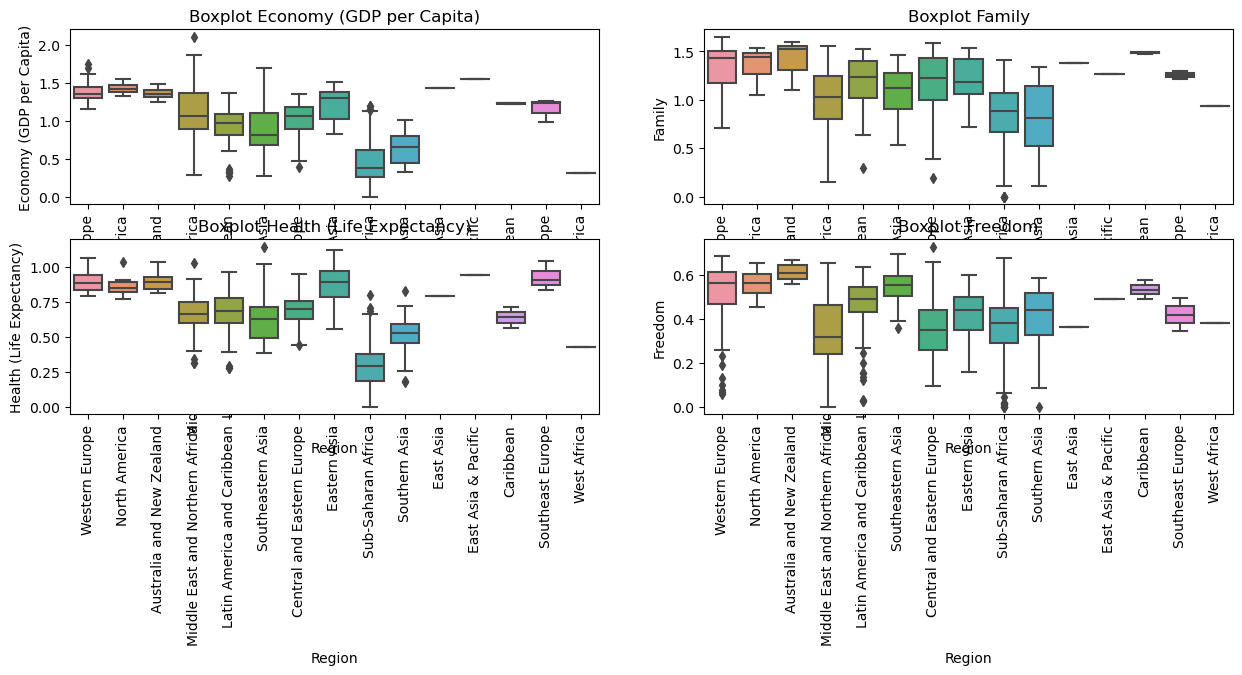

In [37]:
# Tentukan atribut yang ingin ditampilkan dalam boxplot
attributes = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom']

# Tentukan ukuran subplot sesuai jumlah atribut
num_plots = len(attributes)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

# Tentukan ukuran gambar
plt.figure(figsize=(15, 5))

# Loop untuk membuat boxplot untuk setiap atribut
for i, attribute in enumerate(attributes, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x='Region', y=attribute, data=combined_df)
    plt.title(f'Boxplot {attribute}')
    plt.xticks(rotation=90)  # Rotasi label sumbu x agar legible

plt.tight_layout()
plt.show()


In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = combined_df[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)
combined_df['Cluster'] = kmeans.labels_

combined_df[['Country', 'Cluster']]


c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Country,Cluster
0,Switzerland,0
1,Iceland,0
2,Denmark,0
3,Norway,0
4,Canada,0
...,...,...
777,Rwanda,1
778,Tanzania,1
779,Afghanistan,1
780,Central African Republic,1


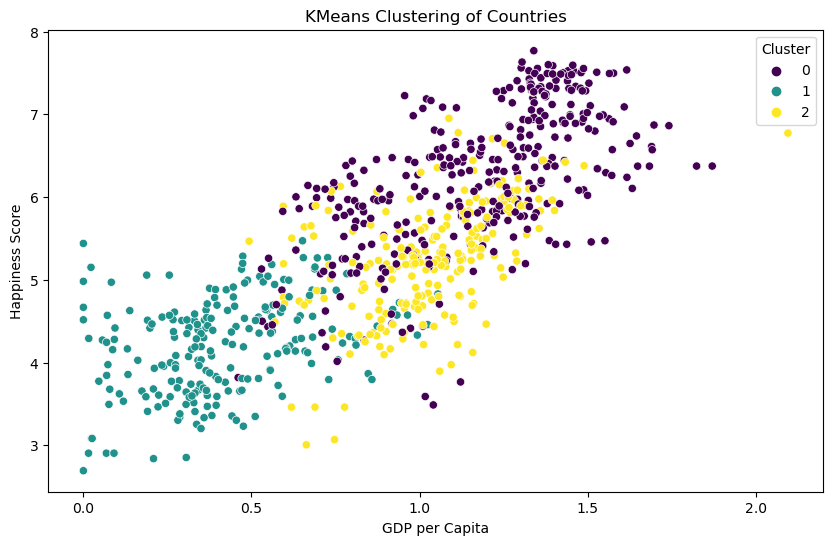

In [39]:
# Visualisasi klaster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', hue='Cluster', data=combined_df, palette='viridis')
plt.title('KMeans Clustering of Countries')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Cluster')
plt.show()


## Analisis Klaster

Berdasarkan analisis klaster yang telah dilakukan, negara-negara dikelompokkan menjadi tiga klaster berdasarkan variabel 'Economy (GDP per Capita)', 'Health (Life Expectancy)', dan 'Freedom':

1. **Klaster 0 (Ungu)**: Negara-negara dalam klaster ini memiliki nilai GDP per Kapita, Harapan Hidup, dan Kebebasan yang relatif tinggi. Ini mungkin mencakup negara-negara maju dengan ekonomi kuat, sistem kesehatan yang baik, dan tingkat kebebasan yang tinggi.

2. **Klaster 1 (Biru)**: Negara-negara dalam klaster ini memiliki nilai GDP per Kapita yang rendah tetapi memiliki variasi dalam Harapan Hidup dan Kebebasan. Ini mungkin mencakup negara-negara berkembang atau negara-negara dengan ekonomi yang kurang stabil.

3. **Klaster 2 (Kuning)**: Negara-negara dalam klaster ini memiliki nilai GDP per Kapita, Harapan Hidup, dan Kebebasan yang moderat. Ini mungkin mencakup negara-negara yang sedang dalam transisi atau memiliki keseimbangan antara ekonomi, kesehatan, dan kebebasan.
